In [1]:
# Some liks
#

In [2]:
import numpy as np              # numerical python
import pandas as pd             # dealing with dataframes (excel-like tables)
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns           # Advanced plots. Built on top of matplotlib.
import math
#from google.colab import drive
import os

# Part 0: Load data and clean data

In [3]:
# open google drive

#import pickle
#from google.oauth2.credentials import Credentials
#from google_auth_oauthlib.flow import InstalledAppFlow
#from googleapiclient.discovery import build

#gd = drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/2020_Exchange/MScCD/Mineria de datos/E900/Data2Analyse/080807_WearMillingY_50%/Level_002')

#os.chdir('G:/Mi unidad/2020_Exchange/MScCD/Mineria de datos/E900/Data2Analyse/080807_WearMillingY_50%/Level_002')

# from linux
data_path = "../data/080807_WearMillingY_50%/Level_002"
os.chdir(data_path)

data_folders = os.listdir()
#print(data_folders)


In [4]:
# Load dataset
#data_str ='../E900/process/080807_WearMillingY_50%/Level_002/Trace_080807_101102R00R110R40R50R60.csv'
num_of_files = len(data_folders)
print('number of files:' +  str(num_of_files))


data_str = data_folders[2]
print("file selected: " + data_str)
df = pd.read_csv(data_str)
print(df.shape)
df.head()

number of files:12
file selected: Trace_080807_101122R00R110R40R50R60.csv
(4805, 8)


,time,+/Nck/!SD/nckServoDataActCurr32 [u1; 1],+/Nck/!SD/nckServoDataActCurr32 [u1; 2],+/Nck/!SD/nckServoDataActCurr32 [u1; 4],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4],+/Channel/!RP/rpa [u1; 15]
0,0.000,0.11920,-0.10895,1.97900,235.52580,-338.03049,419236.71875,1.0
1,0.002,0.12177,-0.11023,1.81494,235.52580,-338.03073,419262.00000,NaN
2,0.004,0.12177,-0.11023,1.51758,235.52580,-338.03091,419287.31250,NaN
3,0.006,0.12177,-0.11023,1.97900,235.52580,-338.03107,419312.62500,NaN
4,0.008,0.12433,-0.11279,2.15332,235.52577,-338.03119,419337.87500,1.0


In [13]:
file_dict = {}
for fileIdx in range(1,num_of_files):
    data_str = data_folders[fileIdx]
    print(data_str)
    df = pd.read_csv(data_str)
    file_dict[data_folders[fileIdx]]= df


Trace_080807_101102R00R110R40R50R60.csv
Trace_080807_101122R00R110R40R50R60.csv
Trace_080807_101141R00R110R40R50R60.csv
Trace_080807_101200R00R110R40R50R60.csv
Trace_080807_101219R00R110R40R50R60.csv
Trace_080807_101238R00R110R40R50R60.csv
Trace_080807_101258R00R110R40R50R60.csv
Trace_080807_101317R00R110R40R50R60.csv
Trace_080807_101336R00R110R40R50R60.csv
Trace_080807_101355R00R110R40R50R60.csv
Trace_080807_101414R00R110R40R50R60.csv
{'Trace_080807_101102R00R110R40R50R60.csv':         time  +/Nck/!SD/nckServoDataActCurr32 [u1; 1]  \
0      0.000                                  0.13202   
1      0.002                                  0.13074   
2      0.004                                  0.13202   
3      0.006                                  0.13202   
4      0.008                                  0.13202   
...      ...                                      ...   
6576  13.152                                 -0.27301   
6577  13.154                                 -0.27173   
657

In [23]:
# Print info
df.info()

# mapping directory
map_dir = {'time' : 'time',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 1]': 'IqAx1',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 2]': 'IqAx2',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 3]': 'IqAx3',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 1]': 'posAx1',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 2]': 'posAx2',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 3]': 'posAx3',
           '+/Nck/!SD/nckServoDataActPower32 [u1; 6]': 'PowerSp',
           '+/Nck/!SD/nckServoDataActVelMot32 [u1; 6]':'VelMotSp',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 4]': 'IqAx4',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 1]': 'pos1stEncAx1',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2]': 'pos1stEncAx2',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3]': 'pos1stEncAx3',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4]': 'pos1stEncAx4',
           '+/Channel/!RP/rpa [u1; 15]': 'R5'}
file_names = list(file_dict.keys())
for file_str in file_names:
    file_dict[file_str].rename(columns=map_dir, inplace=True)

print(file_dict)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          4805 non-null   float64
 1   IqAx1         4805 non-null   float64
 2   IqAx2         4805 non-null   float64
 3   IqAx4         4805 non-null   float64
 4   pos1stEncAx2  4805 non-null   float64
 5   pos1stEncAx3  4805 non-null   float64
 6   pos1stEncAx4  4805 non-null   float64
 7   R5            1202 non-null   float64
dtypes: float64(8)
memory usage: 300.4 KB
{'Trace_080807_101102R00R110R40R50R60.csv':         time    IqAx1    IqAx2    IqAx4  pos1stEncAx2  pos1stEncAx3  \
0      0.000  0.13202 -0.07947  1.80469     235.52499    -338.03159   
1      0.002  0.13074 -0.07819  1.79443     235.52499    -338.03180   
2      0.004  0.13202 -0.07947  1.83545     235.52499    -338.03201   
3      0.006  0.13202 -0.07947  2.04053     235.52499    -338.03214   
4      0.008  0.13202 -

In [24]:
label = ['IqAx1','IqAx2', 'IqAx4']
iq =df[label[0]]
iq.size

4805

## Do some scales:
# 1. Standard scaler (with moving average value and standard deviation)

In [25]:
def moving_standard_scaler(time_series, num):
    """
    Optional docstring explaining the function.
    """
    # Function body
    # Your code here
    N = time_series.size
    maf_signal =  [0] * N
    maf_sima =  [0] * N
    mStdScOut =  [0] * N

    # standard scalar for 1st n values
    for k1 in range(0,num-1):
        maf_signal[k1] = sum(time_series[0:k1+1]) / len(maf_signal[0:k1+1])
        variance = sum((x - maf_signal[k1]) ** 2 for x in time_series[0:k1+1]) / time_series[0:k1+1].size
        maf_sima[k1]= math.sqrt(variance)
        maf_sima[0]=1
        mStdScOut[k1] = (time_series[k1] - maf_signal[k1])/maf_sima[k1]
    # standard scalar for values between n+1 and N
    for k2 in range(num,N-1):
        maf_signal[k2] = sum(time_series[k2-num:k2+1]) / len(maf_signal[k2-num:k2+1])
        variance = sum((x - maf_signal[k2]) ** 2 for x in time_series[k2-num:k2+1]) / len(time_series[k2-num:k2+1])
        maf_sima[k2]= math.sqrt(variance)
        mStdScOut[k2] = (time_series[k2] - maf_signal[k2])/maf_sima[k2]
    return mStdScOut  # Optional


In [26]:
#
from scipy.signal import butter, lfilter, freqz
# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter to the data
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [40]:
# Sample rate and desired cutoff frequency (in Hz)
fs = 500.0
cutoff = 120.0
sample_std_scalar = 12
for file_str in file_names:
    # iqAx1
    iqAx1_filt = moving_standard_scaler(file_dict[file_str]['IqAx1'], sample_std_scalar)
    file_dict[file_str]['IqAx1_sdt_sca'] =iqAx1_filt
    iqAx1_filt = lowpass_filter(iqAx1_filt , cutoff, fs)
    file_dict[file_str]['IqAx1_filt'] =iqAx1_filt
    # iqAx2
    iqAx2_filt = moving_standard_scaler(file_dict[file_str]['IqAx2'], sample_std_scalar)
    file_dict[file_str]['IqAx2_sdt_sca'] =iqAx2_filt
    iqAx2_filt = lowpass_filter(iqAx2_filt , cutoff, fs)
    file_dict[file_str]['IqAx2_filt'] =iqAx2_filt
    # iqAx4
    iqAx4_filt = moving_standard_scaler(file_dict[file_str]['IqAx4'], sample_std_scalar)
    file_dict[file_str]['IqAx4_sdt_sca'] =iqAx4_filt
    iqAx4_filt = lowpass_filter(iqAx4_filt , cutoff, fs)
    file_dict[file_str]['IqAx4_filt'] =iqAx4_filt




C:\Users\thmru\AppData\Local\Temp\ipykernel_2624\1797222584.py:24: RuntimeWarning: invalid value encountered in scalar divide
  mStdScOut[k2] = (time_series[k2] - maf_signal[k2])/maf_sima[k2]
C:\Users\thmru\AppData\Local\Temp\ipykernel_2624\1797222584.py:18: RuntimeWarning: invalid value encountered in scalar divide
  mStdScOut[k1] = (time_series[k1] - maf_signal[k1])/maf_sima[k1]


In [44]:
#iq =moving_standard_scaler(df[label[2]], 12)

# Sample rate and desired cutoff frequency (in Hz)
#fs = 500.0
#cutoff = 120.0
 # Apply the low-pass filter
#iq_filt = lowpass_filter(iq, cutoff, fs)

file_dict[file_names[1]]['IqAx1_sdt_sca']

0       0.000000
1       1.000000
2       0.707107
3       0.577350
4       1.579288
          ...   
4800    1.382189
4801    0.178174
4802    2.143249
4803    1.753163
4804    0.000000
Name: IqAx1_sdt_sca, Length: 4805, dtype: float64

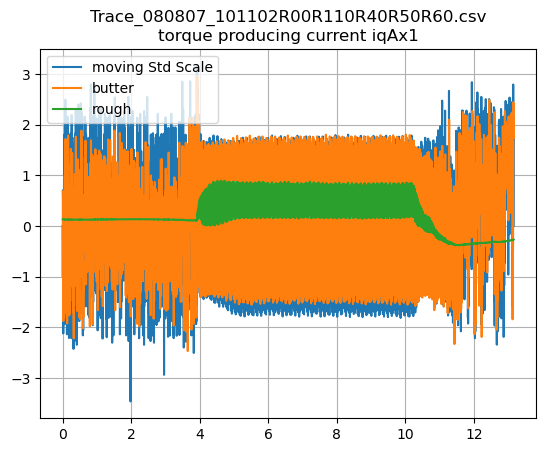

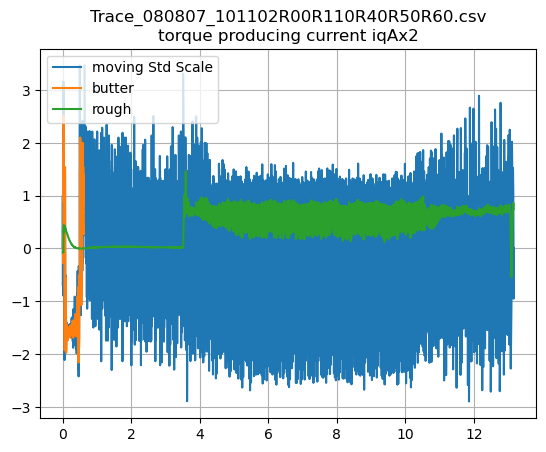

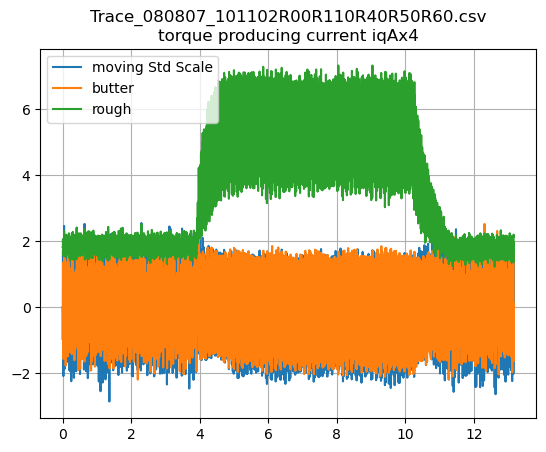

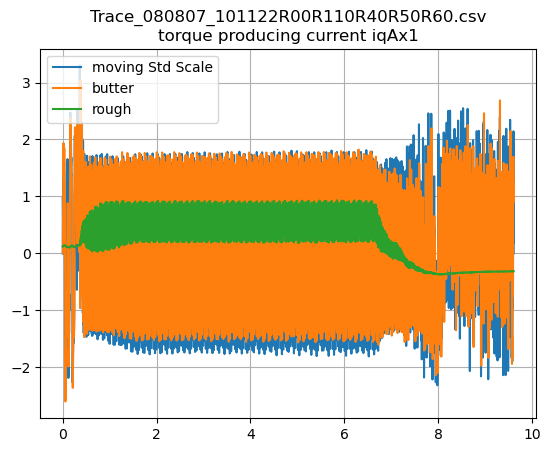

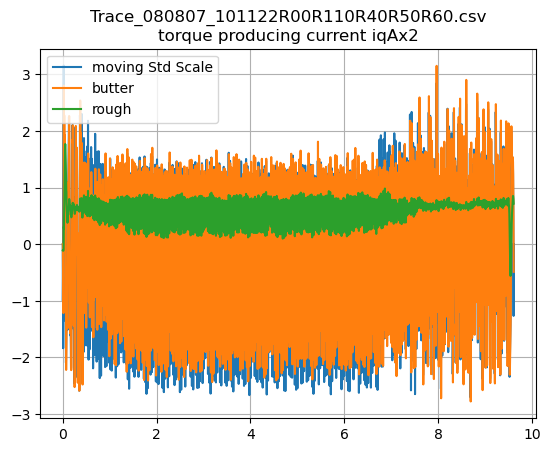

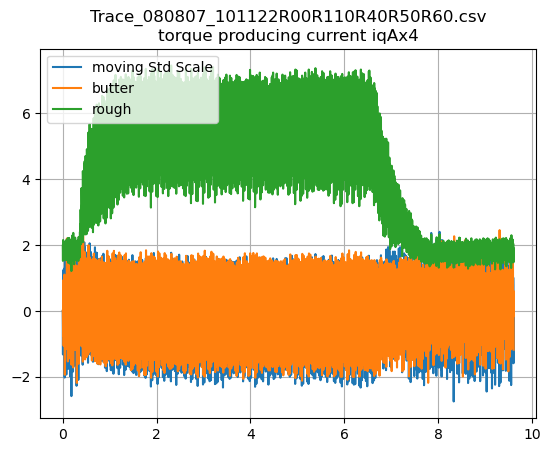

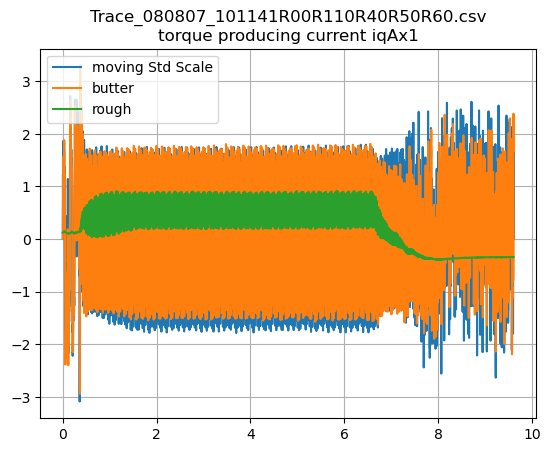

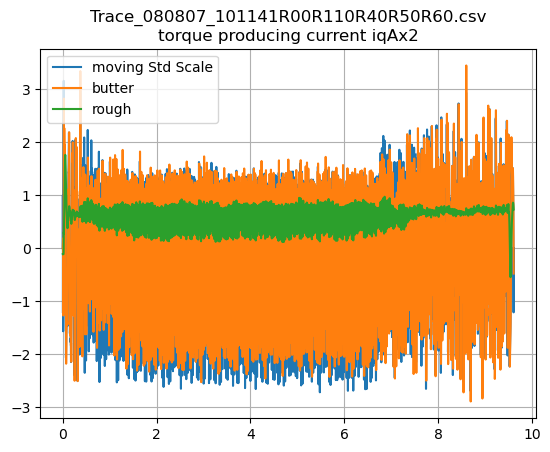

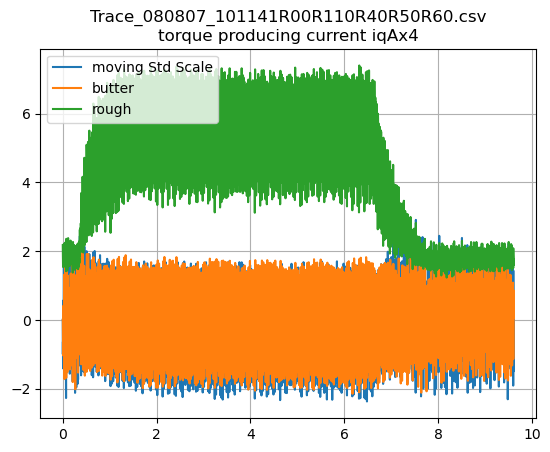

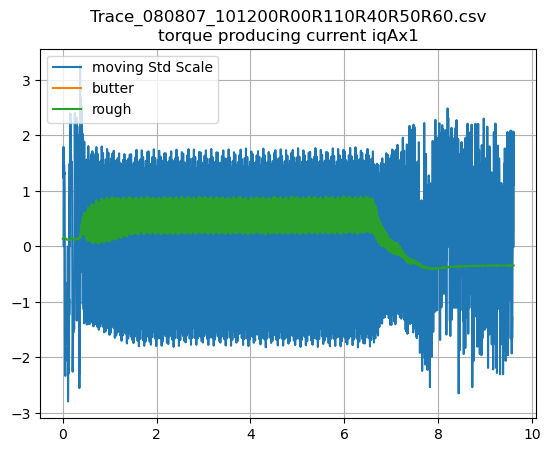

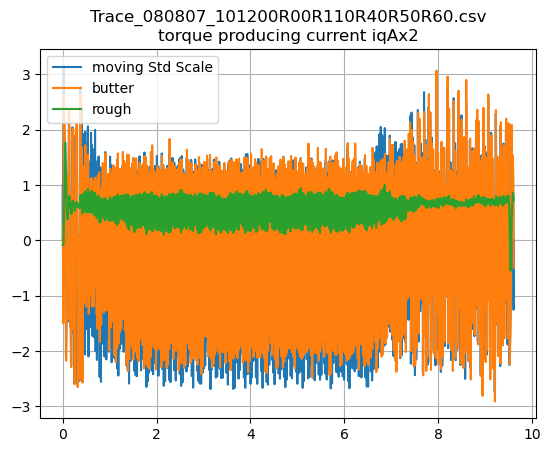

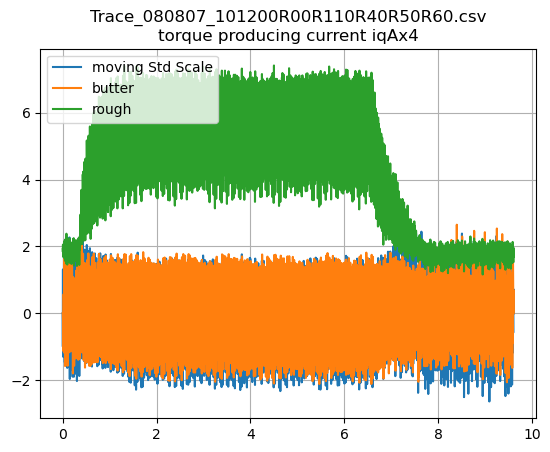

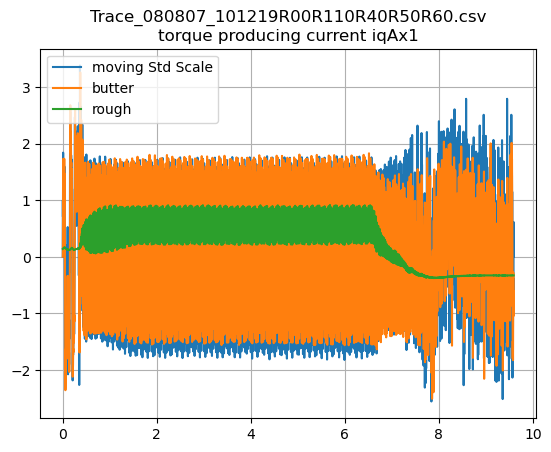

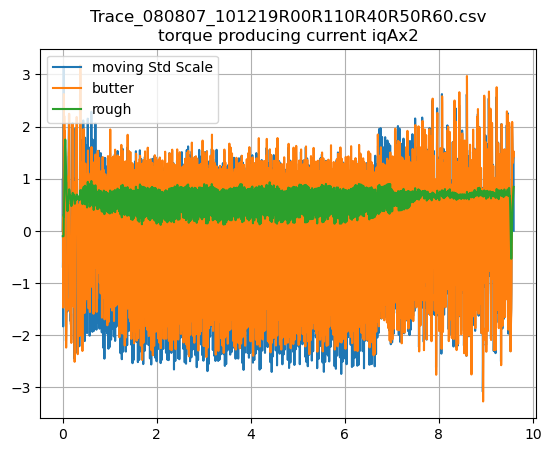

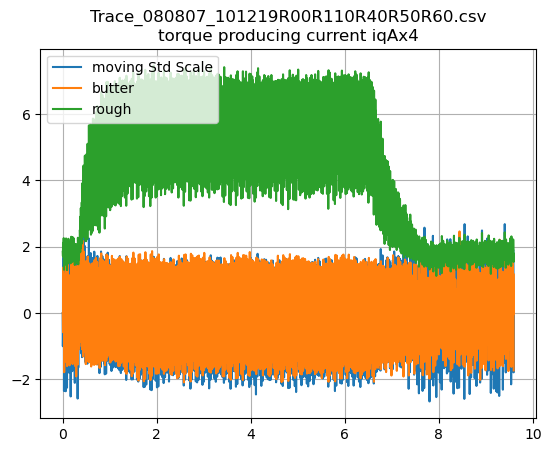

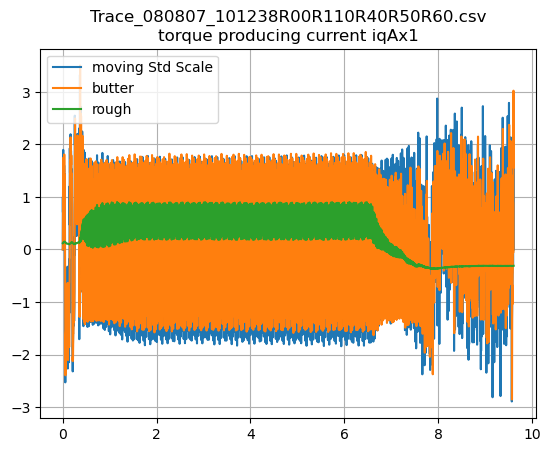

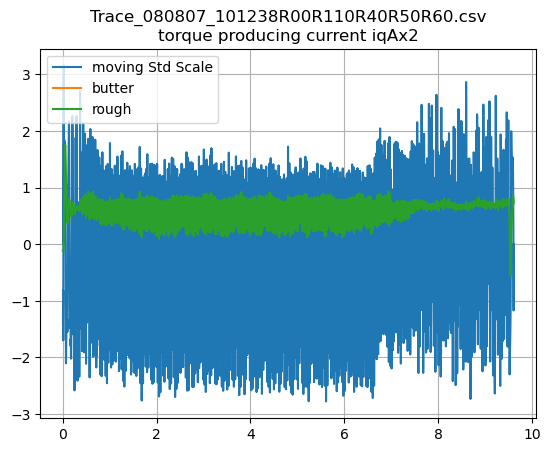

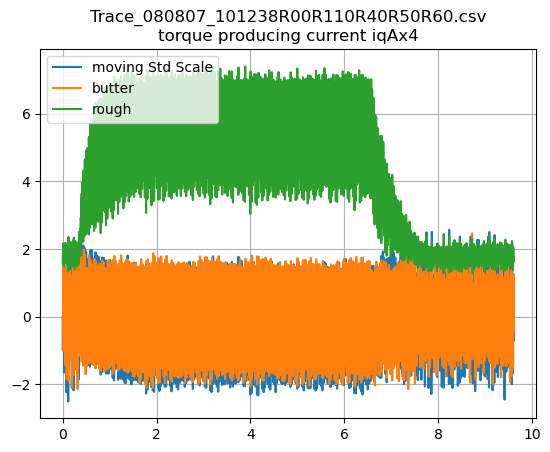

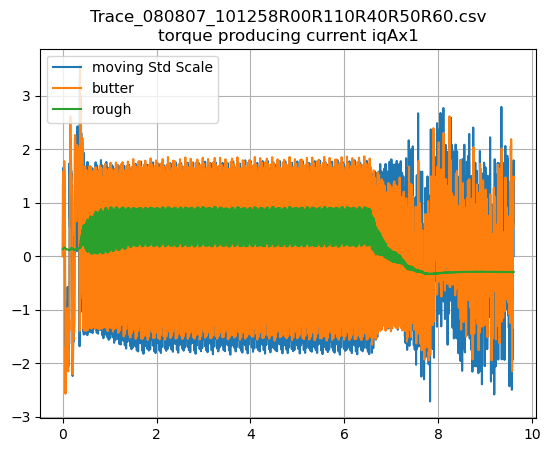

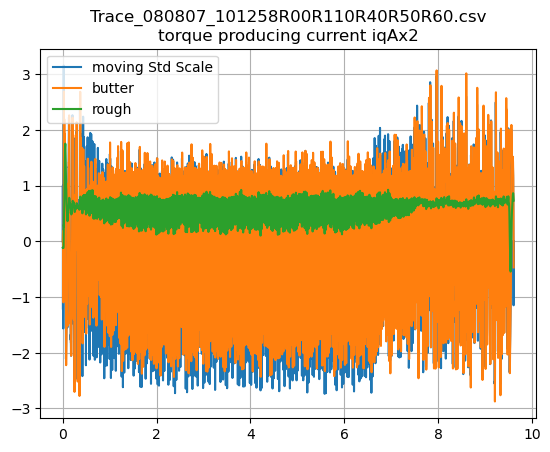

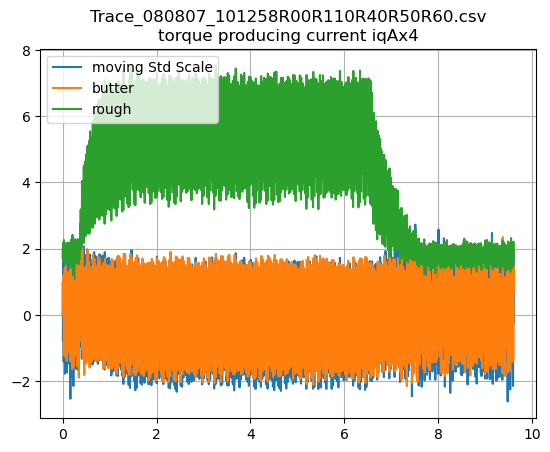

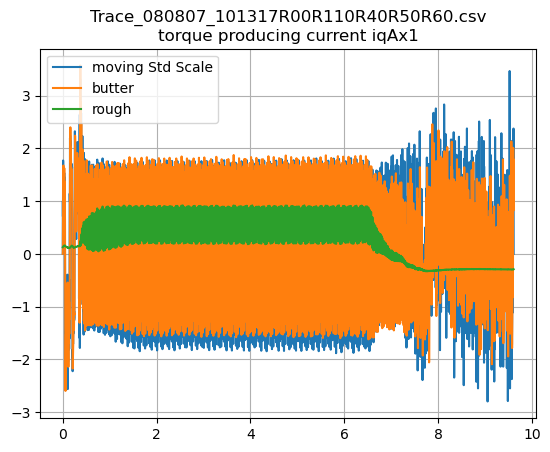

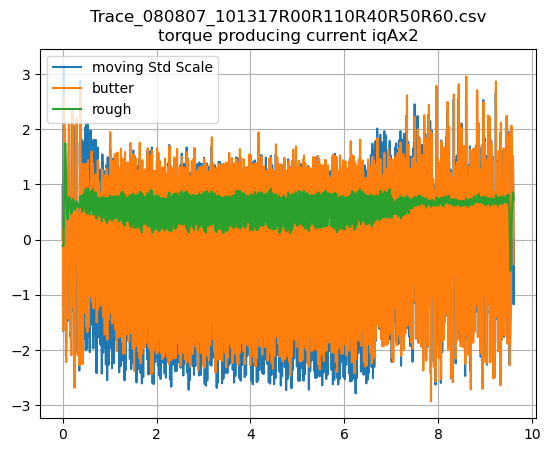

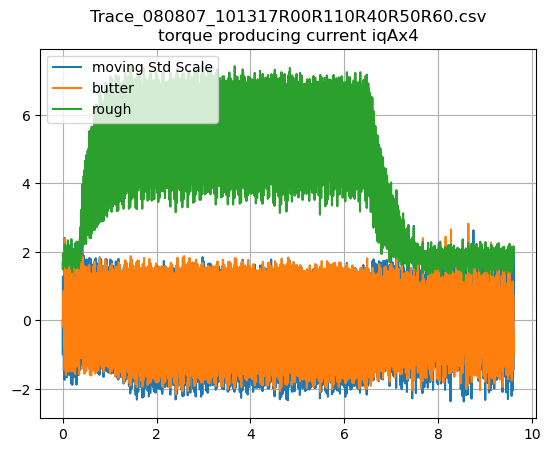

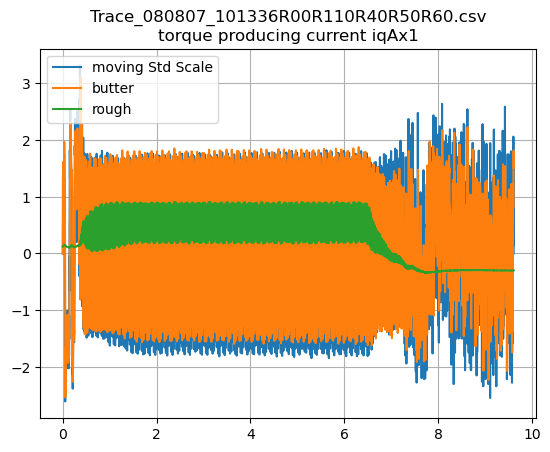

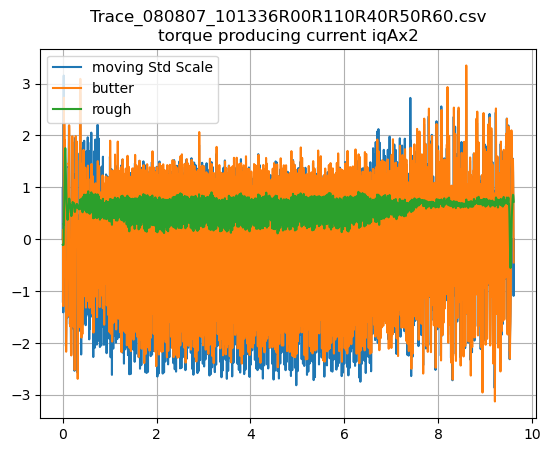

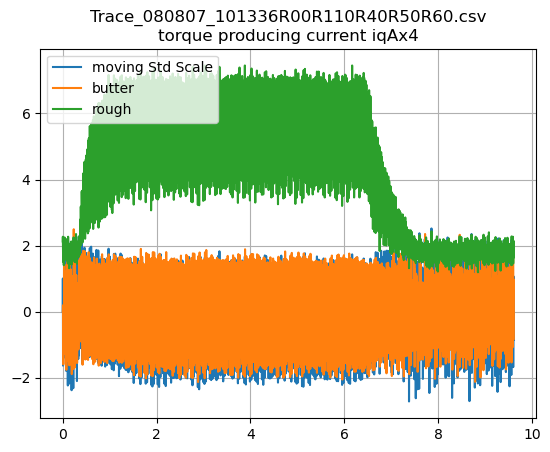

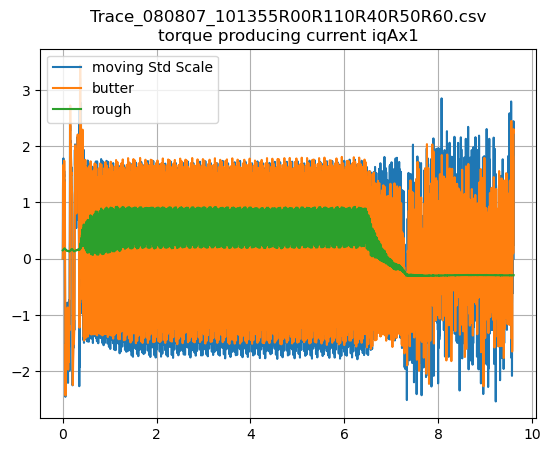

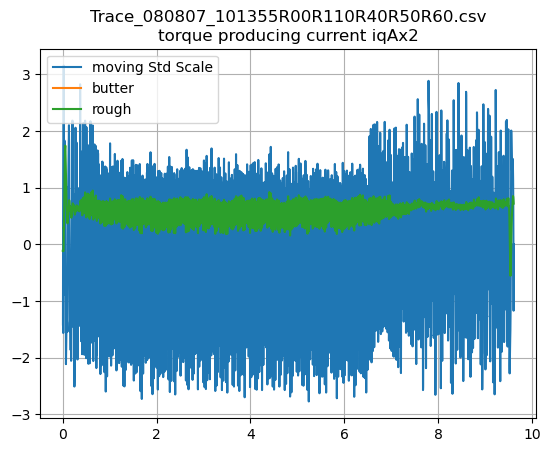

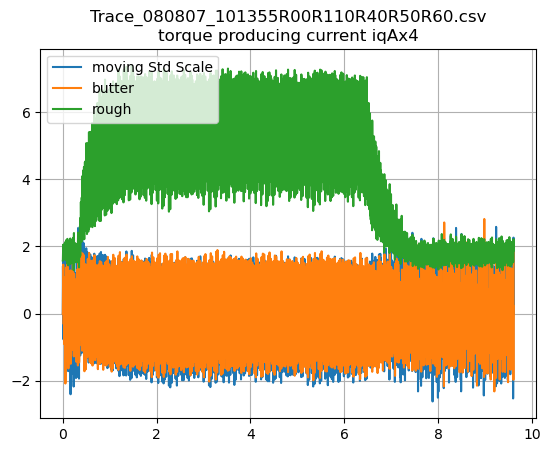

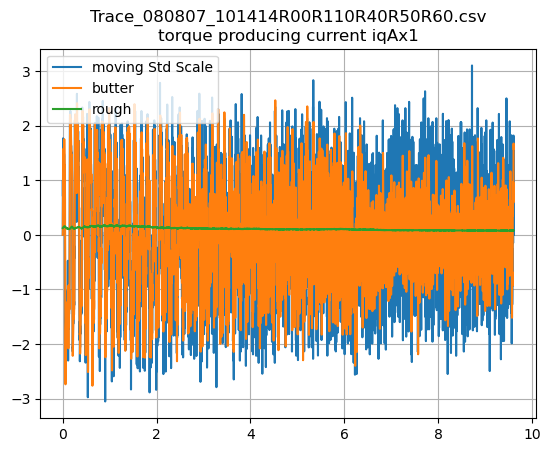

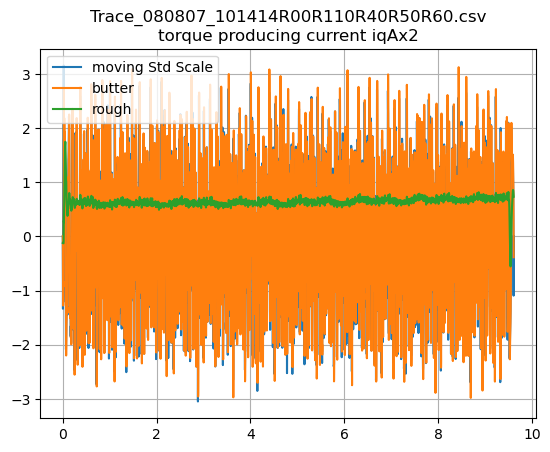

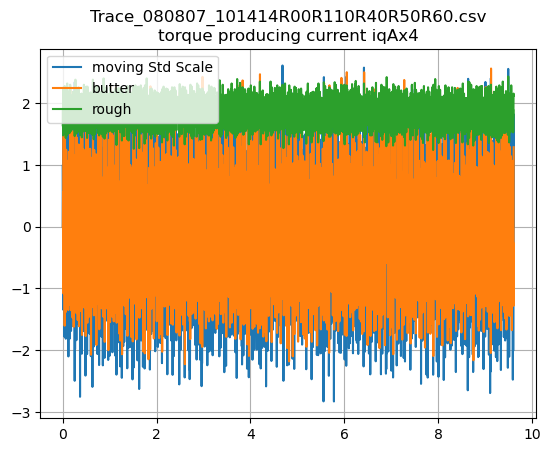

In [74]:
# time series plot before and after scaling
nfiles = len(file_names)
counter = 0
for fileIdx in file_names:
    #counter +=1
    #plt.subplot(nfiles, 3, counter)
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx1_sdt_sca'], label = 'moving Std Scale')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx1_filt'], label = 'butter')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx1'], label = 'rough')
    plt.legend(loc = 2) 
    plt.title(fileIdx + '\ntorque producing current iqAx1')
    plt.grid()
    plt.show()
    
    #counter +=1
    #plt.subplot(nfiles, 3, counter)
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx2_sdt_sca'], label = 'moving Std Scale')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx2_filt'], label = 'butter')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx2'], label = 'rough')
    plt.legend(loc = 2) 
    plt.title(fileIdx + '\ntorque producing current iqAx2')
    plt.grid()
    plt.show()
    
    #counter +=1
    #plt.subplot(nfiles, 3, counter)
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx4_sdt_sca'], label = 'moving Std Scale')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx4_filt'], label = 'butter')
    plt.plot(file_dict[fileIdx]['time'], file_dict[fileIdx]['IqAx4'], label = 'rough')
    plt.legend(loc = 2) 
    plt.title(fileIdx + '\ntorque producing current iqAx4')
    plt.grid()
    plt.show()

### 2. Fast Fourier Transformation (FFT)

4805
3792
131.52965660770033
23675.338189386057


c:\Users\thmru\anaconda3\envs\NumMeth2024\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\thmru\anaconda3\envs\NumMeth2024\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


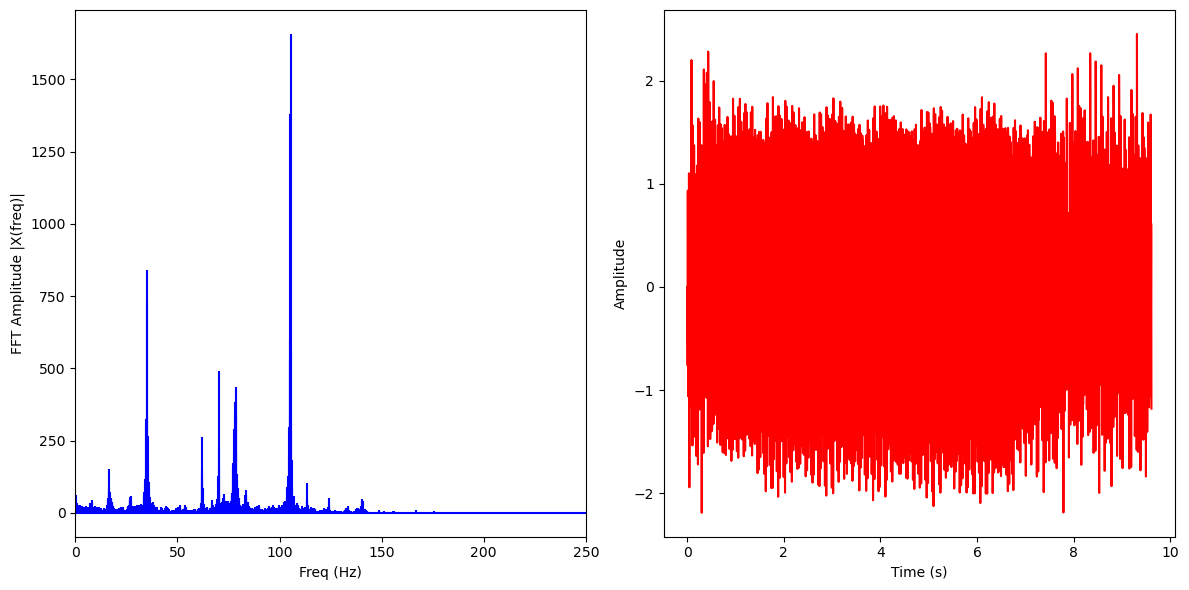

35.14666666666667


In [14]:
# fft of ActVelMot32
from numpy.fft import fft, ifft
sr = 500
t = df['time']
#X = fft(iq) #df[label] test_iq)
#N = len(X)
X = fft(iq_filt) #df[label] test_iq)
N = len(X)

print(N)
n = np.arange(N)
T = N/sr
freq = n/T


idx_max_freq_amp = X[0:4000].argmax()
print(idx_max_freq_amp)
xfreq = freq[idx_max_freq_amp]
print(xfreq/3)
print(xfreq*60)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,500/2)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
print(2108.8/60)

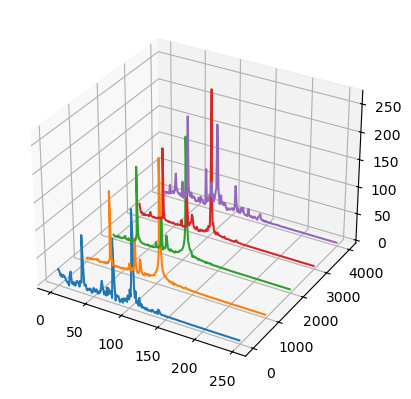

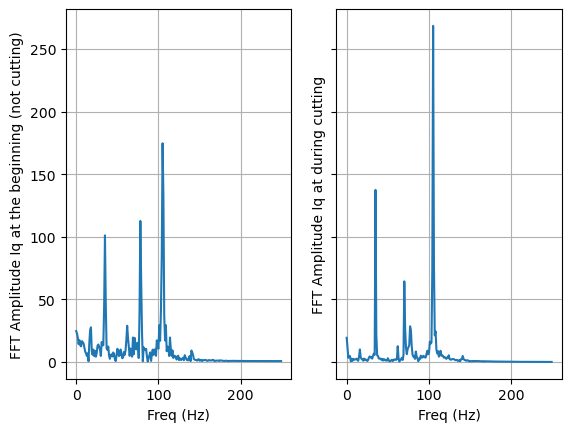

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# FFT over time window
from numpy.fft import fft, ifft
data_len = len(iq)
wind_len = 500
t = df['time']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
counter = 999
counter_lim = 1000
for idx in range(0, data_len-wind_len):
  counter = counter + 1
  sr = 500
  t = df['time']
  #X = fft(iq) #df[label] test_iq)
  #N = len(X)
  X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
  N = len(X)
  n = np.arange(N)
  T = N/sr
  freq = n/T
  idx_end = int(np.floor(N/2))
  if(abs(counter - counter_lim) <= 1e-15):
    ax.plot(freq[0:idx_end],idx*np.ones_like(X[0:idx_end]) , np.abs(X[0:idx_end]) )
    counter = 0
plt.show()
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('run number')
ax.set_zlabel('FFT Amplitude Iq')


##
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
idx = 0
X0 = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
idx_end = int(np.floor(N/2))
ax1.plot(freq[0:idx_end], np.abs(X0[0:idx_end]))
ax1.set_xlabel('Freq (Hz)')
ax1.set_ylabel('FFT Amplitude Iq at the beginning (not cutting)')




idx = 3000
X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
idx_end = int(np.floor(N/2))
ax2.plot(freq[0:idx_end], np.abs(X[0:idx_end]))
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('FFT Amplitude Iq at during cutting')
ax1.grid(True)
ax2.grid(True)


In [16]:
noc = 3
amp_max_nl = max(np.abs(X0))
amp_max_nl
freq_dom = freq[np.abs(X0)==amp_max_nl]
freq_of_interest = freq_dom[0]*1*noc

In [17]:
amp_at_cut = []
amp_at_rot = []
nor = range(0, data_len-wind_len)
for idx in range(0, data_len-wind_len):
  counter = counter + 1
  sr = 500
  t = df['time']
  #X = fft(iq) #df[label] test_iq)
  #N = len(X)
  X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
  N = len(X)
  n = np.arange(N)
  T = N/sr
  freq = n/T
  idx_end = int(np.floor(N/2))
  amp_at_cut.append(np.abs(X[int(freq_of_interest)]))
  amp_at_rot.append(np.abs(X[int(freq_dom[0])]))


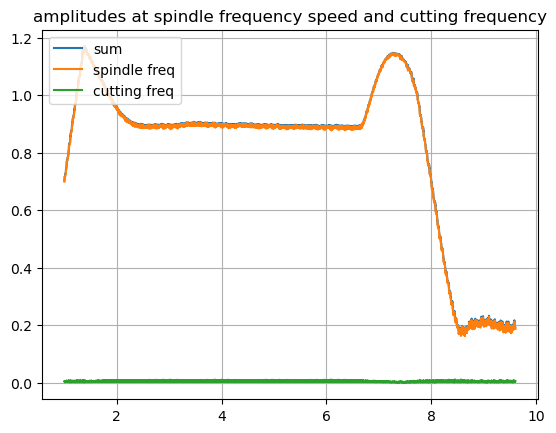

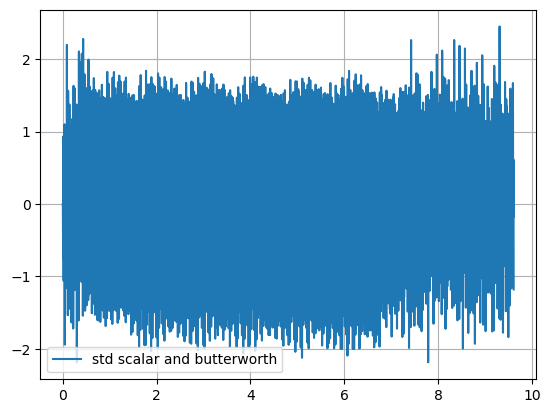

4305
4805


In [18]:
plt.plot(t[wind_len:len(t)], 2*(np.array(amp_at_cut + np.array(amp_at_rot)))/wind_len, label = 'sum')
plt.plot(t[wind_len:len(t)], 2*(np.array(np.array(amp_at_rot)))/wind_len, label = 'spindle freq')
plt.plot(t[wind_len:len(t)], 2*(np.array(amp_at_cut ))/wind_len, label = 'cutting freq')
plt.legend(loc = 2)
plt.grid(True)
plt.title('amplitudes at spindle frequency speed and cutting frequency')
plt.show()
plt.plot(t, iq_filt, label='std scalar and butterworth')
plt.legend(loc = 3)
plt.grid(True)
plt.show()
print(len(nor))
print(len(t))

## 3. Gibbs Sampler - JSTAN (MCMC)

In [39]:
import pystan as ps
# STAN model code

code = """
data { 
    int<lower=0> k;        // number of data points
    int<lower=0> z;        // number of cutting teeth
    real<lower=0> fz;      // feed per tooth
    real<lower=0> ap;      // cutting depth
    real<lower=0> rtool;   // tool radius
    real<lower=0> m_kc;    // prior mean for kc11
    real<lower=0> alpha_mc; // alpha parameter for beta prior of mc
    real<lower=0> beta_mc;  // beta parameter for beta prior of mc
    real Mc[k];            // observed cutting torque
    //real<lower=0, upper=2*pi()> phi[k];           // observed cutting tooth position
    real<lower=0> kappa;   // cutting tool angle
} 

parameters { 
    real<lower=0> kc11;    // parameter kc11 for normal distribution
    real<lower=0, upper=1> mc; //  exponente mc (parameter for beta distribution)
    real<lower=0> tau;     // precision parameter for normal distribution
} 

model { 
    // Priors
    kc11 ~ normal(m_kc, 50);     // Normal prior for kc11 with standard deviation 50
    mc ~ beta(alpha_mc, beta_mc); // Beta prior for mc
    tau ~ gamma(0.5, 0.5);        // Gamma prior for tau
    
    // Likelihood
    for (i in 1:k) {
        real sin_sum = 0;
        //for (j in 1:z) {
        //    sin_sum += pow(sin(phi[i] + (j - 1) * 2 * pi() / z), 1 - mc);
        //}
        
        real pred = (ap * pow(fz, (1 - mc)) * pow(sin(kappa), mc) * kc11 * rtool); //* sin_sum;
        
        Mc[i] ~ normal(pred, 1 / sqrt(tau));  // Normal likelihood with precision tau
    }
}

"""

In [47]:
IqAmp =1.3* 2*(np.array(amp_at_cut + np.array(amp_at_rot)))/wind_len
data = {"Iq": IqAmp,
                "k": len(IqAmp),
                "z": 3, 
                "fz":0.00015, 
                "ap": 0.002,
                "rtool": 0.04/2,
                "m_kc": 2306,
                "alpha_mc": 101.6025,
                "beta_mc": 340.1475,
                "Mc": IqAmp,
                "kappa": 105/180*np.pi
                }


posterior = ps.StanModel(model_code = code)
fit = posterior.sampling(data = data, iter=1000, chains=4)
print(fit)
fit_summary = fit.summary()
#eta = fit["eta"]  # array with shape (8, 4000)
#df = fit.to_frame()  # pandas `DataFrame, requires pandas

In file included from /home/trudolf/anaconda3/envs/mcmc/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:0,
                 from /home/trudolf/anaconda3/envs/mcmc/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/trudolf/anaconda3/envs/mcmc/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/pystan_1pxmxyfo/stanfit4anon_model_2818e91d8d9ffa04d3341c96037fcbf0_4994213936064213002.cpp:1315:
/home/trudolf/anaconda3/envs/mcmc/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~
In file included from /tmp/pystan_1pxmxyfo/stanfit4anon_model_2818e91d8d9ffa04d3341c96037fcbf0_4994213936064213002.cpp:1322:0:
/home/trudolf/anaconda3/envs/mcmc/lib/python3.9/s


Gradient evaluation took 0.001375 seconds
1000 transitions using 10 leapfrog steps per transition would take 13.75 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001347 seconds
1000 transitions using 10 leapfrog steps per transition would take 13.47 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001015 seconds
1000 transitions using 10 leapfrog steps per transition would take 10.15 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.002461 seconds
1000 transitions using 10 leapfrog steps per transition would take 24.61 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)Iteration:   1 / 1000 [  0%]  (Warmup)

Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 37)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 37)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 50

In [48]:
print(fit)
#print(fit_summary)
print(61.71/1.3)

Inference for Stan model: anon_model_2818e91d8d9ffa04d3341c96037fcbf0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
kc11 2306.6    0.98  50.03 2208.6 2273.1 2307.5 2340.0 2407.9   2617    1.0
mc     0.23  4.6e-4   0.02   0.19   0.22   0.23   0.24   0.27   1927    1.0
tau     0.8  4.0e-4   0.02   0.76   0.79    0.8   0.81   0.83   1792    1.0
lp__  -2870    0.04   1.26  -2873  -2871  -2870  -2869  -2869   1008    1.0

Samples were drawn using NUTS at Thu Oct 17 21:10:00 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
47.46923076923077
